In [15]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [10]:
img=cv2.imread("trial.jpg")
img_lab=cv2.cvtColor(img,cv2.COLOR_BGR2LAB)

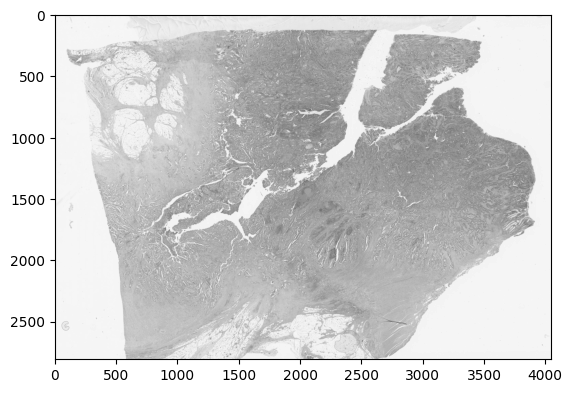

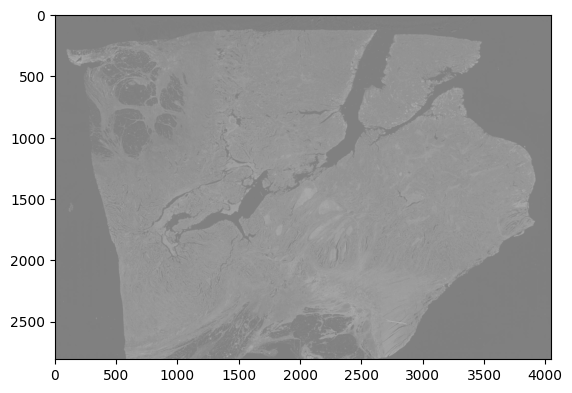

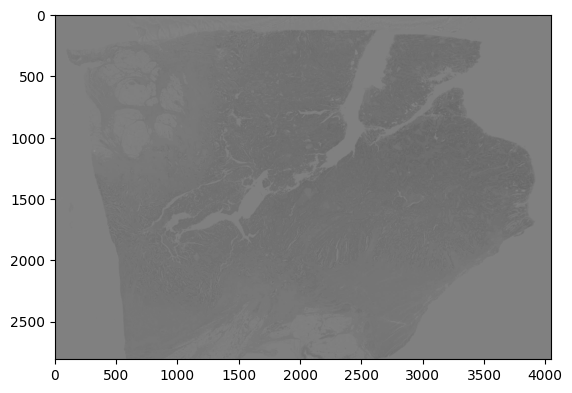

In [14]:
plt.imshow(img_lab[:,:,0],cmap="gray",vmin=0,vmax=255) # L channel
plt.show()
plt.imshow(img_lab[:,:,1],vmin=0,vmax=255,cmap="gray") # A channel
plt.show()
plt.imshow(img_lab[:,:,2],vmin=0,vmax=255,cmap="gray") # B channel
plt.show()


In [19]:
def min_max(image,channel):
    return (img_lab[:,:,channel]-np.min(img_lab[:,:,channel]))/(np.max(img_lab[:,:,channel])-np.min(img_lab[:,:,channel]))

In [20]:
l_channel_norm=min_max(img_lab,0)
a_channel_norm=min_max(img_lab,1)
b_channel_norm=min_max(img_lab,2)


In [104]:
#0.25, removes everything, 1 keeps everything
mask=1-(l_channel_norm>0.65) # removing whites, choose an arbitrary value

#Divide l space into some clusters, apply the masks, check the histograms and the classes where a and b are the same,
#Where are they entirely different, different means 

#Once the clusters are sufficiently different, means are about 0.25 units different, you can furhter repeat the same for a and b
# for the opposite case, combine a and b
#Then try with pixel positions and see if any clusters comes out

In [105]:
filtered_a=(a_channel_norm*mask)
filtered_b=(b_channel_norm*mask)

(0.0, 5000000.0)

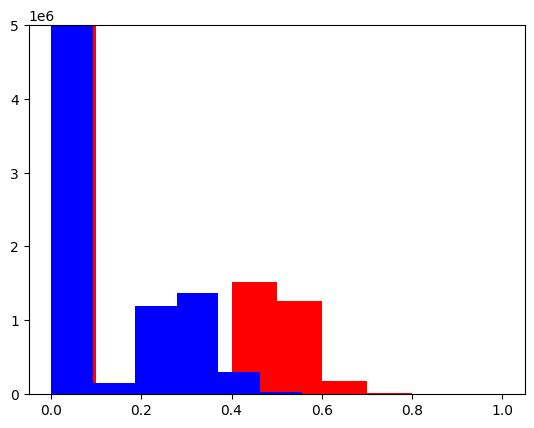

In [106]:
plt.hist(filtered_a.flatten(), bins=10, color='red')
#plt.title('A Channel (LAB) Histogram')
#plt.xlim([0.2, 0.8])
#plt.ylim(0,5*np.power(10,6))
#plt.show()
plt.hist(filtered_b.flatten(), bins=10, color='blue')
#plt.title('B Channel (LAB) Histogram')
#plt.xlim([0.1, 0.6])
plt.ylim(0,5*np.power(10,6))

In [107]:
a_red=cv2.merge([filtered_a,np.zeros_like(filtered_a),np.zeros_like(filtered_a)])
b_blue=cv2.merge([np.zeros_like(filtered_b),np.zeros_like(filtered_b),filtered_b])
a_red=np.asarray(a_red*255,np.uint8)
b_blue=np.asarray(b_blue*255,np.uint8)

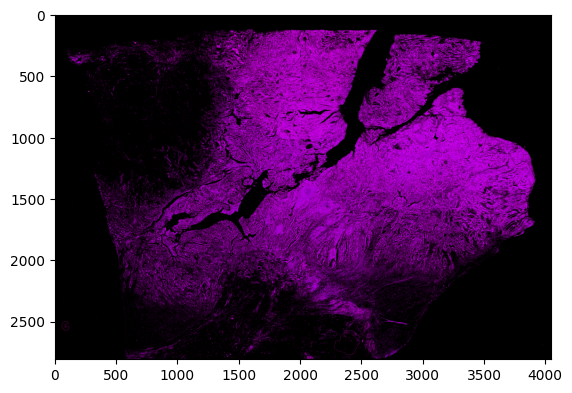

In [108]:
weighted=cv2.addWeighted(a_red,0.5,b_blue,0.5,0)
plt.imshow(weighted*255)

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)